#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

1- Basic Data Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [25]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [26]:
# Identify the number of rows and columns in the dataset

string= " number of coulmes : {}, number of rows : {}".format(df.shape[0],df.shape[1])
string

' number of coulmes : 148654, number of rows : 13'

In [27]:
# determine the data types of each column
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [28]:
# check for missing values in each column.
print(df.isna().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


2- Descriptive Statistics:


In [29]:
# Calculate basic statistics mean, median, mode, minimum, and maximum salary
import numpy as np

print("mean : ",df["TotalPay"].mean())
print("median :",df["TotalPay"].median())
print("mode :",df["TotalPay"].mode())
print("max :",df["TotalPay"].max())
print("min :",df["TotalPay"].min())
print("rang :",df["TotalPay"].max() - df["TotalPay"].min())
print("standard deviation :",np.std(df["TotalPay"]))

mean :  74768.32197169267
median : 71426.60999999999
mode : 0    0.0
Name: TotalPay, dtype: float64
max : 567595.43
min : -618.13
rang : 568213.56
standard deviation : 50516.83535894512


**3- Data Cleaning**

In [30]:
# Handle missing data by suitable method with explain why you use it.

# The two columns (Notes, Status) contain only empty values, so we delete the two columns completely because we do not need the empty data and it will negatively affect the accuracy of the model after training.
df = df.dropna(axis=1, how='all')
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


In [31]:
# Delete lines containing NaN values
df = df.dropna(axis=0)
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,San Francisco
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco


**4- Basic Data Visualization**

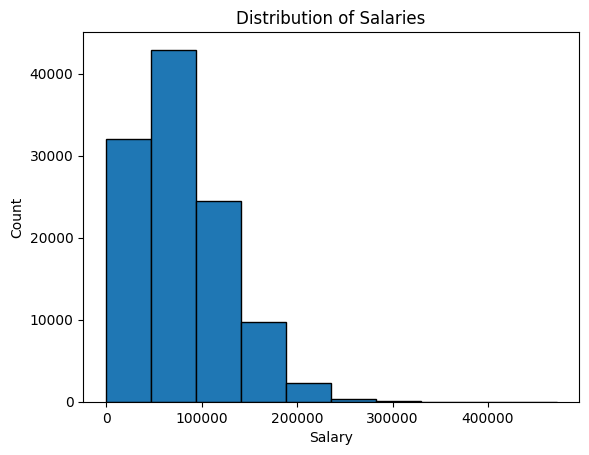

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(df['TotalPay'], bins=10, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salaries')
plt.show()

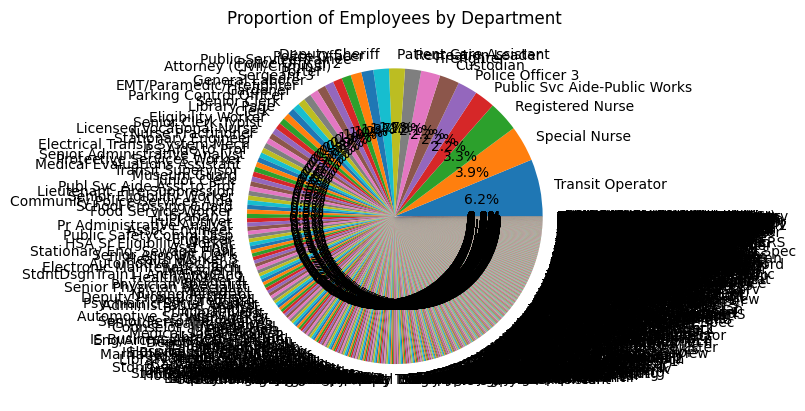

In [35]:
department_counts =  df['JobTitle'].value_counts()
department_percentages = department_counts / department_counts.sum() * 100

plt.pie(department_percentages, labels=department_percentages.index, autopct='%1.1f%%')
plt.title('Proportion of Employees by Department')
plt.show()

**5- Grouped Analysis: **

In [50]:
# Group columns by department (JobTitle)

grouped_data = df.groupby('JobTitle')
grouped_data.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,San Francisco
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
147887,147888,George M Rush,Special Assistant 11,1022.82,0.00,0.00,10.22,1022.82,1033.04,2014,San Francisco
148150,148151,Shirley M Parker,Real Property Manager,0.00,0.00,647.76,0.00,647.76,647.76,2014,San Francisco
148308,148309,Gary K Williams,Supt Water Treatment Fac,0.00,0.00,375.38,0.00,375.38,375.38,2014,San Francisco
148407,148408,Jasmine M Romero,Assistant Recreation Director,0.00,0.00,247.83,0.00,247.83,247.83,2014,San Francisco


In [51]:
num_groups = len(grouped_data)
num_groups

1109

In [52]:
# compare the average salaries across different groups.
print(grouped_data['TotalPay'].mean())

JobTitle
ACPO,JuvP, Juv Prob (SFERS)        62290.780000
ASR Senior Office Specialist       63519.363167
ASR-Office Assistant               41511.501951
Account Clerk                      43145.753774
Accountant I                       62036.101250
                                      ...      
Wire Rope Cable Maint Sprv        203033.720000
Worker's Comp Supervisor 1         70389.297143
Worker's Compensation Adjuster     73249.269865
X-Ray Laboratory Aide              50823.942700
Youth Comm Advisor                 41414.307500
Name: TotalPay, Length: 1109, dtype: float64


In [53]:
salary_column = 'TotalPay'
other_column = 'TotalPayBenefits'

In [61]:
correlation_coefficient = df[salary_column].corr(df[other_column])
print("Correlation Coefficient:", correlation_coefficient)

# فهذا يشير إلى ترابط إيجابي قوي

Correlation Coefficient: 0.9938859437453248


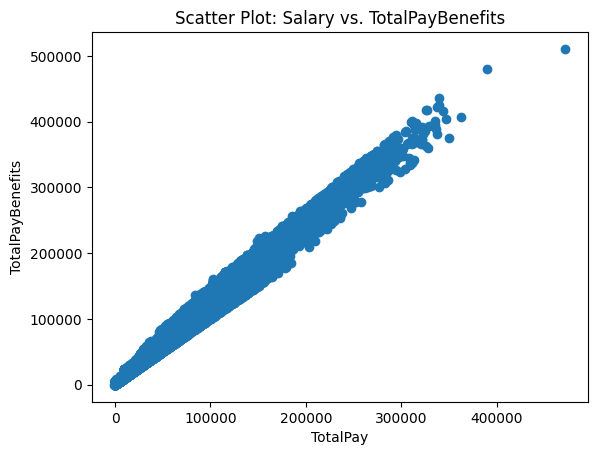

In [62]:
plt.scatter(df[salary_column], df[other_column])
plt.xlabel(salary_column)
plt.ylabel(other_column)
plt.title("Scatter Plot: Salary vs. " + other_column)
plt.show()

[Brief Report]

Title: Salary Analysis Project

Introduction:
The purpose of this project was to explore and analyze a dataset containing salary information. The project involved various steps, including data exploration, descriptive statistics, data cleaning, basic data visualization, grouped analysis, and simple correlation analysis. The goal was to gain insights into the salary distribution, identify any correlations, and compare salaries across different groups.

1. Basic Data Exploration:
- Number of Rows: [number of rows]
- Number of Columns: [number of columns]
- Data Types: Each column's data type was determined.
- Missing Values: Missing values were checked in each column.

2. Descriptive Statistics:
- Mean: Calculated the mean salary.
- Median: Determined the median salary.
- Mode: Identified the mode of the salary distribution.
- Minimum: Found the minimum salary value.
- Maximum: Found the maximum salary value.
- Range: Computed the range of salaries.
- Standard Deviation: Calculated the standard deviation of the salary data.

3. Data Cleaning:
- Missing Data Handling: Missing data was handled using [method], which was chosen because Where I lost by deleting the columns whose values ​​are all empty and the lines that contain empty values

4. Basic Data Visualization:
- Histograms/Bar Charts: Created histograms or bar charts to visualize the distribution of salaries.
- Pie Charts: Used pie charts to represent the proportion of employees in different departments.

5. Grouped Analysis:
- Grouping: The data was grouped by one  column (job tilte).
- Summary Statistics: Calculated summary statistics ( average salaries) for each group.
- Comparison: Compared the average salaries across different groups.

6. Simple Correlation Analysis:
- Correlation: Identified any correlation between salary and another numerical column (TotalPay, TotalPayBenefits) The relationship was very strong between these two pillars
- Scatter Plot: Visualized the relationship between salary and the other numerical column using a scatter plot.




# Good Luck!